# Pre-analysis


## Importing the data

Libraries and the data will be imported

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [109]:
data_raw=pd.read_csv('/content/train.csv')

##Exploring the data

Exploring data

In [110]:
data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Checking NaN

In [111]:
data_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Exploring the correlation

near to 1 = positive correlation

near to 0 = no linear relationship

near to -1 = negative correlation

In [112]:
corr = data_raw.corr() 
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


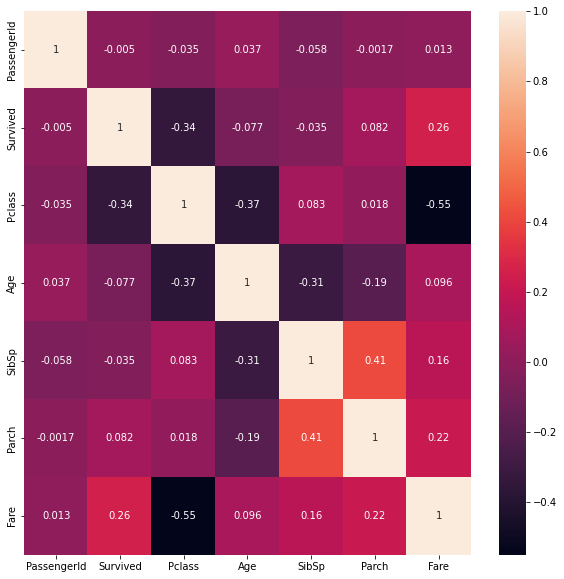

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Checking normal distribution

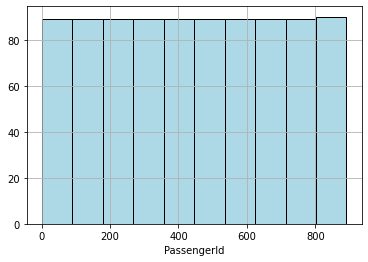

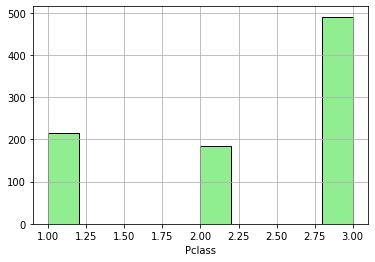

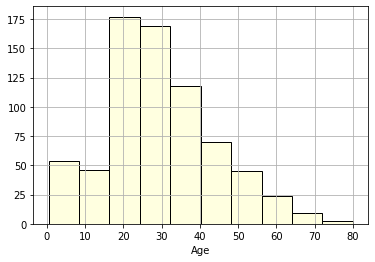

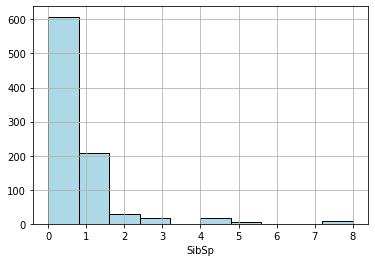

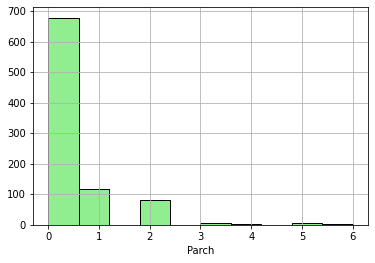

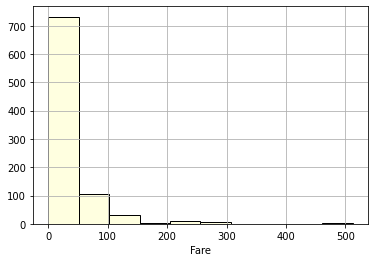

In [114]:
data_raw["PassengerId"].hist(color='lightblue',edgecolor = 'black')
plt.xlabel('PassengerId')
plt.show()
data_raw["Pclass"].hist(color='lightgreen',edgecolor = 'black')
plt.xlabel('Pclass')
plt.show()
data_raw["Age"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Age')
plt.show()
data_raw["SibSp"].hist(color='lightblue',edgecolor = 'black')
plt.xlabel('SibSp')
plt.show()
data_raw["Parch"].hist(color='lightgreen',edgecolor = 'black')
plt.xlabel('Parch')
plt.show()
data_raw["Fare"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Fare')
plt.show()



## Cleaning Data

Dropping not useful columns right now

In [116]:
data = data_raw.copy()
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
print(data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


checking NaN

In [117]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Evaluating the distribution for the column with NaN

Text(0.5, 0, 'Age')

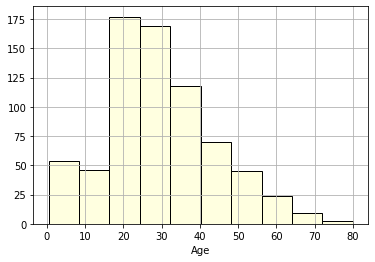

In [118]:
data["Age"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Age')

Modifying NaN from age column

In [119]:
# Creating empty lists
f_total = []
f_married = []
f_single = []
f_unknown = []

# Adding to the list the age of married or single woman
for i, v in data_raw[data_raw["Sex"]=="female"]["Name"].items():
  if "Mrs" in v:
    f_married.append(data_raw["Age"][i])
  elif "Miss" in v:
    f_single.append(data_raw["Age"][i])
  else:
    f_unknown.append(data_raw["Age"][i])
  f_total.append(data_raw["Age"][i])

# Putting into a serie the lists
S_f_married = pd.Series(f_married)
S_f_single = pd.Series(f_single)
S_f_unknown = pd.Series(f_unknown)
S_m_total = pd.Series(data_raw[data_raw['Sex']=='male']['Age'])

# Creating each mean
mean_f_married, mean_f_single, mean_f_unknown, mean_m_total = 0,0,0,0

# Adding values to the mean variables
if S_f_married.isna().sum() !=0:
  mean_f_married = S_f_married.dropna().mean()
if S_f_single.isna().sum() !=0:
  mean_f_single = S_f_single.dropna().mean()
if S_f_unknown.isna().sum() !=0:
  mean_f_unknown = S_f_unknown.dropna().mean()
if S_m_total.isna().sum() !=0:
  mean_m_total = S_m_total.dropna().mean()

# Replacing NaN values for - 1
data["Age"].fillna(-1,inplace=True)

# Inverting the bool for next code block
not_Mrs = ~data_raw['Name'].str.contains("Mrs")
not_Miss = ~data_raw['Name'].str.contains("Miss")

# Replacing the -1 values for the right mean at each section
for i,v in data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].items():
  if data["Age"].loc[i] == -1:
    data["Age"].loc[i]= mean_f_married
for i,v in data[(data_raw['Sex']=='female')& (data_raw['Name'].str.contains("Miss"))]['Age'].items():
  if data["Age"].loc[i] == -1:
    data["Age"].loc[i]= mean_f_single
for i,v in data[(data_raw['Sex']=='female')& (not_Mrs & not_Miss)]['Age'].items():
  if data["Age"].loc[i] == -1:
    data["Age"].loc[i]= mean_f_unknown
for i,v in data[data_raw['Sex']=='male']['Age'].items():
  if data["Age"].loc[i] == -1:
    data["Age"].loc[i]= mean_m_total

# Uncomment to check values
'''
print(mean_f_married)
print(mean_f_single)
print(mean_f_unknown)
print(mean_m_total)

print(f'Married: {f_married}')
print(f'Single: {f_single}')
print(f'Unknown: {f_unknown}')
print(f'Total: {f_total}')
'''

# Replacing NaN for Embarked column
data['Embarked'].fillna('Unknown',inplace=True)

# Checking NaN
print(data.isna().sum())

# Data
print(data["Age"].loc[5])
data


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
30.72664459161148


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,21.777778,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [120]:
f = pd.DataFrame(data = [[0, 0]], columns = ['A', 'B']).astype('Int64')
f['C'] = f['A'] / f['B']
f.fillna(0)

,A,B,C
0,0,0,NaN


Checking the age data after the change

Text(0.5, 0, 'Age')

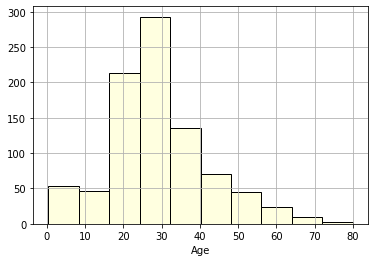

In [121]:
data["Age"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Age')

In [122]:
print(data)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  21.777778      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]


In [123]:
print(data.isna().sum())
print(data['Age'].dtype)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
float64


#Statistical tests

##Information

### **Parametric statistical tests (normal distribution)**
---
-Z-test: difference between a sample and the population with standard deviation
`ztest`

---
-One-Sample t-test: Same as Z-test without standard deviation
`ttest_1samp`

---
-Paired t-tests: difference between two samples
`ttest_rel`

---
Two-Sample t-Test: there is any significant difference between two variables
`ttest_ind`

---
-ANOVA tests:more than two groups
`f_oneway`

---
-Correlation test, Pearson’s (continuous): chech if there is a linear correlation between two variables `pearsonr`

---



### **Non-Parametric Statistical Tests**

-Chi-Square Goodness-of-Fit, GoF(**not continuous**): compare the observed frequencies of a sample with its expected frequencies
`chisquare`

---
-Chi-square test of independence(**not continuous**): there is an association between two discrete or categorical variables
`chi2_contingency`

---

-Wilcoxon rank-sum test (**continuous**): difference between two groups of data.
`ranksums`

---
-Kruskal-Wallis H test(**continuous or categorical data**): compare the means of two or more groups 
`kruskal`

---

### References

---

https://www.stratascratch.com/blog/basic-types-of-statistical-tests-in-data-science/#:~:text=for%20population%20mean.-,Z%2Dtest%20for%20Population%20Mean,mean%20against%20the%20population%20mean.

---

https://vitalflux.com/different-types-of-statistical-tests-concepts-examples/#:~:text=Statistical%20tests%20are%20an%20important,difference%20between%20the%20two%20groups.

---

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

---

https://www.statstest.com/wilcoxon-signed-rank-test/



Function to be called in statistics tests, for print the results

In [124]:
def print_statistics(var1,var2,p):
  
  print("Ho = hipotesis null, {} do not differ significantly from {}".format(var1,var2))
  print("Ha = alternative hipotesis, {} differ significantly from {}".format(var1,var2))

  if (p>0.05):
    print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
  else:
    print(f"Ho was rejected, they differ significantly, p-value= {p}")

##Chi-Square Independence Test


Although the name of this statistical test is similar to the previous test, the Chi-Square independence test has a different purpose compared to Chi-Square GoF. We use indepence test when we want to observe whether there is an association between two discrete or categorical variables.

To properly conduct this statistical test, we need to make sure that our data fulfills the following conditions:

-The two variables should be discrete or categorical variables

-The sample size of both categories should be large enough. As a rule of thumb, there should be 5 samples in each category

-The samples from both categories are randomly selected.


###Sex

In [125]:
var1 = 'Survived'
var2 = 'Sex'

ct = pd.crosstab(data[var1], data[var2])
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)
print_statistics(var1,var2,p)

Sex       female  male
Survived              
0             81   468
1            233   109
Ho = hipotesis null, Survived do not differ significantly from Sex
Ha = alternative hipotesis, Survived differ significantly from Sex
Ho was rejected, they differ significantly, p-value= 1.1973570627755645e-58


###Pclass

In [126]:
var1 = 'Survived'
var2 = 'Pclass'

ct = pd.crosstab(data[var1], data[var2])
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)
print_statistics(var1,var2,p)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Ho = hipotesis null, Survived do not differ significantly from Pclass
Ha = alternative hipotesis, Survived differ significantly from Pclass
Ho was rejected, they differ significantly, p-value= 4.549251711298793e-23


###SibSp

In [127]:
var1 = 'Survived'
var2 = 'SibSp'

ct = pd.crosstab(data[var1], data[var2])
print(ct)
#without 2 last rows, because they have small data
ct.drop([8,5],axis = 1,inplace=True)
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)
print_statistics(var1,var2,p)

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0
SibSp       0    1   2   3   4
Survived                      
0         398   97  15  12  15
1         210  112  13   4   3
Ho = hipotesis null, Survived do not differ significantly from SibSp
Ha = alternative hipotesis, Survived differ significantly from SibSp
Ho was rejected, they differ significantly, p-value= 6.0554702010956636e-06


###Parch

In [128]:
var1 = 'Survived'
var2 = 'Parch'

ct = pd.crosstab(data[var1], data[var2])
print(ct)
#without 4 last rows, because they have small data
ct.drop([6,5,4,3],inplace=True, axis =1)
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)
print_statistics(var1,var2,p)

Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0
Parch       0   1   2
Survived             
0         445  53  40
1         233  65  40
Ho = hipotesis null, Survived do not differ significantly from Parch
Ha = alternative hipotesis, Survived differ significantly from Parch
Ho was rejected, they differ significantly, p-value= 9.886126509051868e-06


###Embarked

In [129]:
#without 4 last rows, because they have small data
var1 = 'Survived'
var2 = 'Embarked'

ct = pd.crosstab(data[var1], data[var2])
print(ct)
#without 4 last rows, because they have small data
ct.drop('Unknown',inplace=True,axis=1)
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)
print_statistics(var1,var2,p)

Embarked   C   Q    S  Unknown
Survived                      
0         75  47  427        0
1         93  30  217        2
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
Ho = hipotesis null, Survived do not differ significantly from Embarked
Ha = alternative hipotesis, Survived differ significantly from Embarked
Ho was rejected, they differ significantly, p-value= 1.769922284120912e-06


##Two-Sample t-Test


So far, we have covered the case where we want to infer one variable. In some cases, what we want to do instead is to compare two independent variables and observe whether there is any significant difference between two variables. For this purpose, we can use a two-sample t-test.

To properly conduct this test, we need to make sure that our data fulfills the following conditions.

-Two variables are independent

-Two variables are randomly selected from their population

-Two variables are continuous variables and have normal distribution distribution

-The result of the statistical test will be more robust or reliable if the sample size of two variables are the same.

### Age

In [130]:
var1 = 'Survived'
var2 = 'Age'

t,p= stats.ttest_ind(data[data[var1]==0][var2],data[data[var1]==1][var2] )
print_statistics(var1,var2,p)

Ho = hipotesis null, Survived do not differ significantly from Age
Ha = alternative hipotesis, Survived differ significantly from Age
Ho was rejected, they differ significantly, p-value= 0.019226065001037445


##Kruskal-Wallis H-test 

tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

### Fare

In [131]:
var1 = 'Survived'
var2 = 'Fare'

x = data[data[var1]==0][var2]
y = data[data[var1]==1][var2]
t,p= stats.kruskal(x,y)
print_statistics(var1,var2,p)

Ho = hipotesis null, Survived do not differ significantly from Fare
Ha = alternative hipotesis, Survived differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 4.547532067492866e-22


In [132]:
var1 = 'Embarked'
var2 = 'Fare'

x = data[data[var1]=='C'][var2]
y = data[data[var1]=='Q'][var2]
w = data[data[var1]=='S'][var2]
z = data[data[var1]=='Unknown'][var2] # too few data
t,p= stats.kruskal(x,y,w)
print_statistics(var1,var2,p)

Ho = hipotesis null, Embarked do not differ significantly from Fare
Ha = alternative hipotesis, Embarked differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 6.970943556149538e-17


#Graph analysis

Graph analysis:

Darker = more data

lighter = less data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


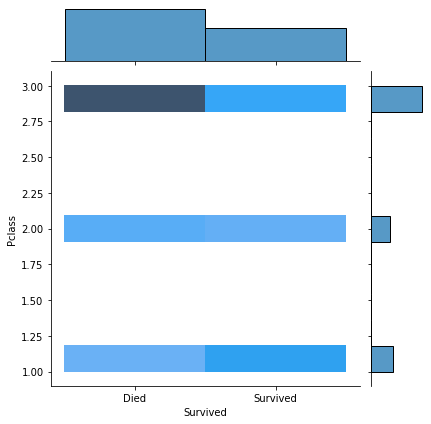

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


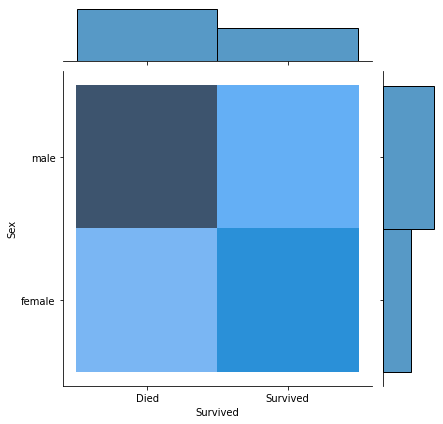

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


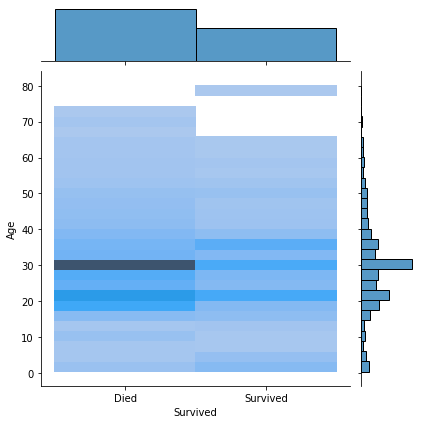

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


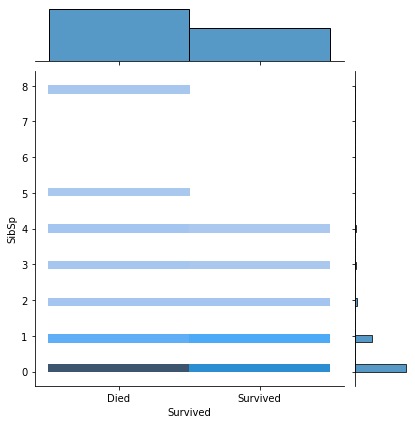

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


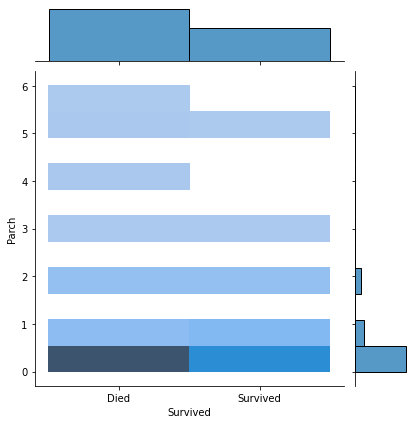

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


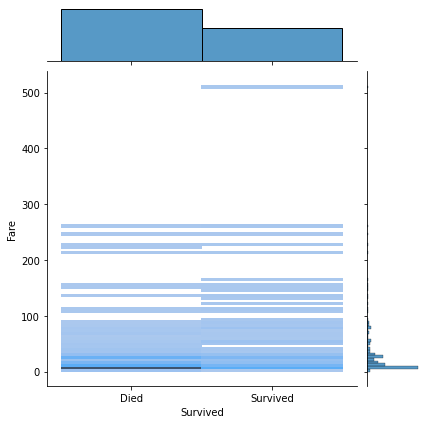

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


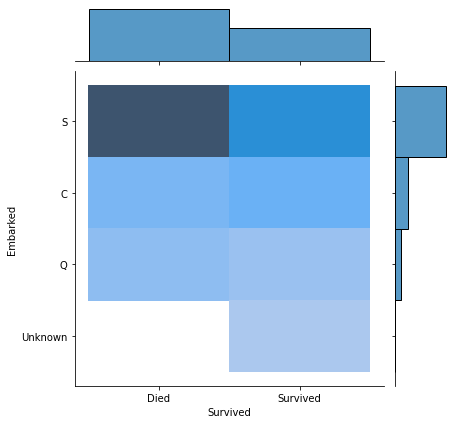

In [133]:
#replacing survived column with string
Surv_temp = data["Survived"].replace([0,1],['Died','Survived'])

#creating graphs
for x in data.columns:
  if x != "Survived":
    sns.jointplot(Surv_temp,data[x], kind='hist')
    plt.show()

# Analysis Tests

##Importing data and exploring

In [134]:
test=pd.read_csv('/content/train.csv')
print(test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Sex x Survived

In [135]:
# Sex x Survived

# Short algorithm
print(test.groupby("Sex")["Survived"].mean())

# Long algorithm, step by step
num_male = test[test["Sex"]=="male"]['Sex'].count()
num_female = test[test["Sex"]=="female"]['Sex'].count()
not_surv_male = test[(test["Sex"]=="male") & (test["Survived"]==0)]["Sex"].count()
not_surv_female = test[(test["Sex"]=="female") & (test["Survived"]==0)]["Sex"].count()
surv_male = test[(test["Sex"]=="male") & (test["Survived"]==1)]["Sex"].count()
surv_female = test[(test["Sex"]=="female") & (test["Survived"]==1)]["Sex"].count()

# % survived
m = [surv_male/num_male, not_surv_male/num_male]
f = [surv_female/num_female, not_surv_female/num_female]

print('Percent of men that survived: {:.2%}'.format(m[0]))
print('Percent of women that survived: {:.2%}'.format(f[0]))


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Percent of men that survived: 18.89%
Percent of women that survived: 74.20%


## Pclass x Survived

In [136]:
# Short algorithm
print(test.groupby("Pclass")["Survived"].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Fare x Survived

In [137]:
print('Survived 1 = ', test[test['Survived']== 1]['Fare'].mean())
print('Survived 0 = ', test[test['Survived']== 0]['Fare'].mean())

Survived 1 =  48.39540760233918
Survived 0 =  22.117886885245902


## Embarked x Survived

In [138]:
print(test.groupby("Embarked")["Survived"].mean())

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


## SibSp x Survived

In [139]:
print(test.groupby("SibSp")["Survived"].mean())

# dropping small data
temp = test.groupby("SibSp")["Survived"].mean()
temp.drop([5,8],inplace=True)

print(temp)

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
Name: Survived, dtype: float64


## Parch x Survived

In [140]:
print(test.groupby("Parch")["Survived"].mean())

# dropping small data
temp = test.groupby("Parch")["Survived"].mean()
temp.drop([6,5,4,3],inplace=True)

print(temp)

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
Name: Survived, dtype: float64


## Age x Survived

In [141]:
print('Survived 1 = ', test[test['Survived']== 1]['Age'].mean())
print('Survived 0 = ', test[test['Survived']== 0]['Age'].mean())

Survived 1 =  28.343689655172415
Survived 0 =  30.62617924528302


##Embarked x Fare

In [142]:
print(test.groupby("Embarked")["Fare"].mean())

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


#Questions

Questions

1 - How many men are in the database?

2 - How many children are in the database (less than 12 years old)?

3 - How many married women are in the database?

4 - What is the average age of survivors?

5 - What is the price of the most expensive third-class ticket?

6 - Which man paid the most expensive ticket?

7 - How old is the wife of the owner of the ship Mr. John Jacob Astor in the wreck?

Exploring the data

In [143]:
test=pd.read_csv('/content/train.csv')
print(test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

1 - How many men are in the database?

In [144]:
# 1 - How many men are in the database?
print(data[data["Sex"]=="male"]['Sex'].count())

577


2 - How many children are in the database (less than 12 years old)?

In [145]:
#2 - How many children are in the database (less than 12 years old)?
print(data[data['Age']<12]['Age'].count())

68


3 - How many married women are in the database?

In [146]:
#3 - How many married women are in the database?

#counters
f_total = 0
f_married = 0
f_single = 0
f_unknown = 0

# Searching for the data
for i, v in data_raw[data_raw["Sex"]=="female"]["Name"].items():
  if "Mrs" in v:
    f_married+=1
  elif "Miss" in v:
    f_single+=1
  else:
    f_unknown+=1
  f_total+=1


print(f'Married: {f_married}')
print(f'Single: {f_single}')
print(f'Unknown: {f_unknown}')
print(f'Total: {f_total}')


Married: 129
Single: 180
Unknown: 5
Total: 314


4 - What is the average age of survivors?

In [147]:
#4 - What is the average age of survivors?
print(data[data['Survived']==1]['Age'].mean())

28.33160065665759


5 - What is the price of the most expensive third-class ticket?

In [148]:
#5 - What is the price of the most expensive third-class ticket?
print(data[data["Pclass"]==3]['Fare'].max())

69.55


6 - Which man paid the most expensive ticket?

In [149]:
#6 - Which man paid the most expensive ticket?
print(data['Fare'].value_counts().sort_index(ascending=False))
print(data['Fare'].max())

512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
            ..
6.4375       1
6.2375       1
5.0000       1
4.0125       1
0.0000      15
Name: Fare, Length: 248, dtype: int64
512.3292


In [150]:
print(data_raw[ (data_raw['Fare']==512.3292) & (data_raw['Sex']=='male') ] )

     PassengerId  Survived  Pclass                                Name   Sex  \
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez  male   
737          738         1       1              Lesurer, Mr. Gustave J  male   

      Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
679  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737  35.0      0      0  PC 17755  512.3292         B101        C  


7 - How old is the wife of the owner of the ship Mr. John Jacob Astor in the wreck?

In [151]:
#7 - How old is the wife of the owner of the ship Mr. John Jacob Astor in the wreck?
for i, v in data_raw["Name"].items():
  if ("Jacob" in v) & ("Astor" in v):
    print(data_raw.iloc[i])

PassengerId                                                  701
Survived                                                       1
Pclass                                                         1
Name           Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Sex                                                       female
Age                                                         18.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17757
Fare                                                     227.525
Cabin                                                    C62 C64
Embarked                                                       C
Name: 700, dtype: object


#Conclusions

---

**Statistical Tests**

The column 'PassengerId' are Equally distributed, the columns 'Name' and 'Ticket' have soo many different data not related with names, and the column 'Cabin' has too many NaN to evaluate. So they do not have a strong correlation with 'Survived' for analysis.

For all the others columns, they differ from survived, Ho was rejected with less then 5%:

* Sex, p-value = 1.1973570627755645e-58

* Pclass, p-value = 4.549251711298793e-23

* Fare, p-value = 4.547532067492866e-22

* Embarked, p-value = 1.769922284120912e-06

* SibSp, p-value = 6.0554702010956636e-06

* Parch, p-value = 9.886126509051846e-06

* Age, p-value = 0.019226065001037445

Sex have the smaller p-value, so it has the most probability of correlation

The Fares also differ from Embarked places, with p-value= 6.970943556149538e-17.

---

**Analysis Tests**

* Sex x Survived

  * Men: 18.9% Survived

  * Women: 74.2% Survived

* Pclass x Survived

  * 1° Class: 63% Survived

  * 2° Class: 47.3% Survived

  * 2° Class: 24.2% Survived

* Survived x Average Fare

  * Survived: 48.4

  * Not Survived: 22.12

* Embarked x Survived

  * Cherbourg: 55.4% Survived
 
  * Southampton: 33.7% Survived
  
  * Queenstown: 39% Survived
  
* SibSp x Survived

  * SibSp 0: 34.5% Survived

  * SibSp 1: 53.6% Survived

  * SibSp 2: 46.4% Survived

  * SibSp 3: 25% Survived

  * SibSp 4: 16.7% Survived

* Parch x Survived

  * Parch 0: 34.4% Survived

  * Parch 1: 55.1% Survived

  * Parch 2: 50% Survived

* Survived x Average Age

  * Survived: 28.34 Years old

  * Not Survived: 30.63 Years old
  
*  Embarked x Average Fare

  * Cherbourg: 59.95
 
  * Southampton: 27.08
  
  * Queenstown: 13.28

---

**Questions**

1. How many men are in the database?

  577 men

2. How many children are in the database (less than 12 years old)?

  68 children

3. How many married women are in the database?

  129 women married

4. What is the average age of survivors?

  28.55 years old

5. What is the price of the most expensive third-class ticket?

  69.55

6. Which man paid the most expensive ticket?

  Two man paid the most expensive ticket at value 512.3292: Cardeza, Mr. Thomas Drake Martinez and Lesurer, Mr. Gustave J

7. How old is the wife of the owner of the ship Mr. John Jacob Astor in the wreck?

  18 years old

---